<a href="https://colab.research.google.com/github/Aarohi-jain84/predictive-maintenance-industrial/blob/main/maintenance_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Simulate time-series sensor data
np.random.seed(42)
n_samples = 1000

data = {
    'machine_id': np.random.randint(1, 6, n_samples),
    'timestamp': pd.date_range(start='2024-01-01', periods=n_samples, freq='H'),
    'sensor_1': np.random.normal(loc=50, scale=5, size=n_samples),
    'sensor_2': np.random.normal(loc=75, scale=8, size=n_samples),
    'sensor_3': np.random.normal(loc=100, scale=10, size=n_samples),
    'sensor_4': np.random.normal(loc=120, scale=15, size=n_samples),
    'RUL': np.clip(np.linspace(100, 0, n_samples) + np.random.normal(0, 5, n_samples), 0, None)
}

df = pd.DataFrame(data)
df.to_csv('sensor_data.csv', index=False)
print("✅ Dataset 'sensor_data.csv' created successfully!")
df.head()


✅ Dataset 'sensor_data.csv' created successfully!


<ipython-input-1-1846666869>:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.date_range(start='2024-01-01', periods=n_samples, freq='H'),


,machine_id,timestamp,sensor_1,sensor_2,sensor_3,sensor_4,RUL
0,4,2024-01-01 00:00:00,50.546974,77.390023,92.658262,105.212943,105.730138
1,5,2024-01-01 01:00:00,53.628833,68.985672,100.819956,115.737674,85.712368
2,3,2024-01-01 02:00:00,52.405046,71.589139,104.572804,137.921443,99.716748
3,5,2024-01-01 03:00:00,51.119420,84.187566,114.558223,133.419708,99.170606
4,5,2024-01-01 04:00:00,46.047628,75.906163,107.045065,99.407108,97.331418


In [2]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load dataset
df = pd.read_csv('sensor_data.csv')

# Step 3: Check for missing values
print("Missing values:\n", df.isnull().sum())

# Step 4: Drop non-numeric or unnecessary columns
df_model = df.drop(columns=['timestamp', 'machine_id'])

# Step 5: Separate features and target
X = df_model.drop(columns=['RUL'])
y = df_model['RUL']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Missing values:
 machine_id    0
timestamp     0
sensor_1      0
sensor_2      0
sensor_3      0
sensor_4      0
RUL           0
dtype: int64


Mean Squared Error: 980.0521
R² Score: -0.1859


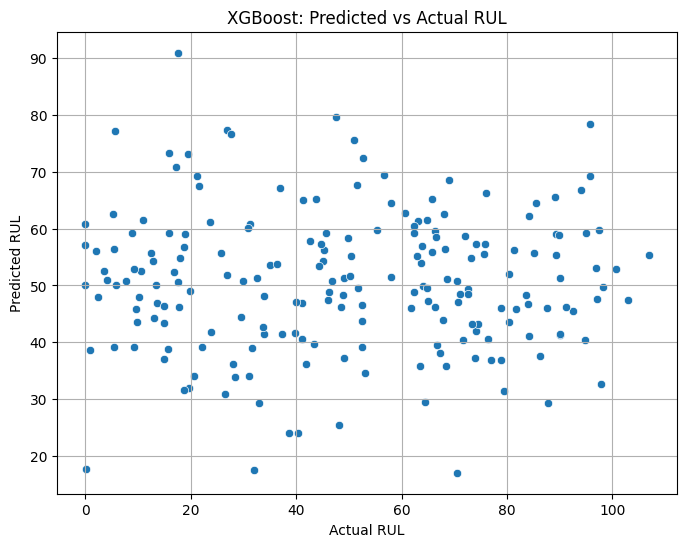

In [3]:
# Step 8: Train the XGBoost Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 9: Predict on test data
y_pred = model.predict(X_test_scaled)

# Step 10: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 11: Plot predicted vs actual RUL
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("XGBoost: Predicted vs Actual RUL")
plt.grid(True)
plt.show()


In [4]:
# Reshape input to [samples, timesteps, features]
# For this simple demo, we'll treat each sample as a sequence of 1 timestep
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, X_train_scaled.shape[1]), activation='relu'))
lstm_model.add(Dense(1))  # Output layer

# Compile
lstm_model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Train the model
history = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 3320.0974 - val_loss: 3518.4407
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3116.2080 - val_loss: 3505.5266
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3284.4443 - val_loss: 3489.9910
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3400.9668 - val_loss: 3470.1694
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3161.0110 - val_loss: 3445.4890
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3320.4573 - val_loss: 3413.4160
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3077.5818 - val_loss: 3373.6914
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3269.9143 - val_loss: 3323.6841
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3108.7173 - val_loss: 3263.7051
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3052.7910 - val_loss: 3194.3477
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2830.2607 - val_loss: 3113.6128
Epoch 1

In [7]:
# Predict on the test set
y_pred_lstm = lstm_model.predict(X_test_lstm)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate evaluation metrics
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print("LSTM Model Evaluation:")
print("Mean Squared Error:", round(mse_lstm, 4))
print("R² Score:", round(r2_lstm, 4))


LSTM Model Evaluation:
Mean Squared Error: 1864.7679
R² Score: -1.2564


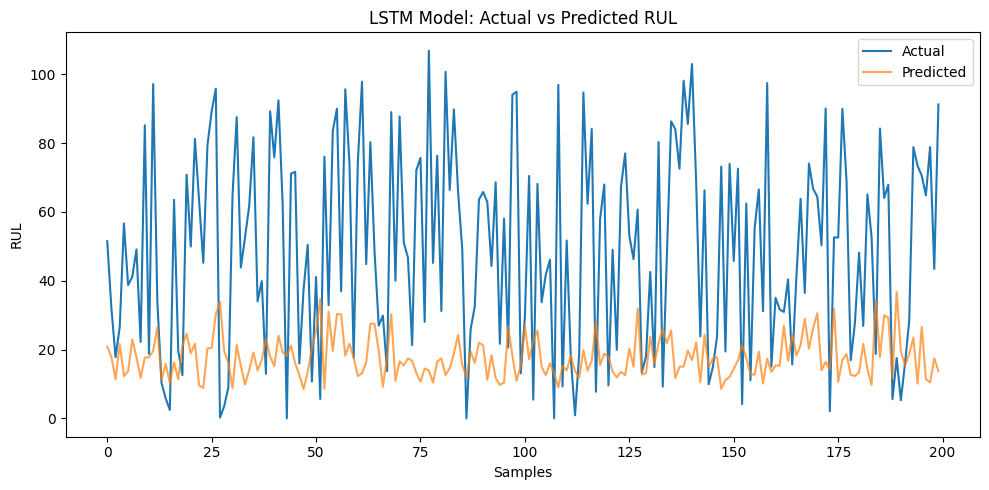

In [9]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lstm, label='Predicted', alpha=0.7)
plt.title('LSTM Model: Actual vs Predicted RUL')
plt.xlabel('Samples')
plt.ylabel('RUL')
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
def predict_rul_lstm(input_features):
    """
    Predict Remaining Useful Life (RUL) from input features.
    """
    if len(input_features) != 4:
        raise ValueError("Input must be a list of 4 sensor values.")

    input_array = np.array(input_features).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)

    return prediction[0]


In [20]:
sample_input = [0.7, 0.3, 0.6, 0.5]
print("Predicted RUL:", round(predict_rul_lstm(sample_input), 2))

Predicted RUL: 41.8


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
